In [1]:
import xgboost

import shap

In [46]:
shap.datasets

<module 'shap.datasets' from '/mnt/ssd2/yifan/miniconda3/envs/llama/lib/python3.12/site-packages/shap/datasets.py'>

In [47]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [4]:
# train XGBoost model
X, y = shap.datasets.adult(n_points=2000)
model = xgboost.XGBClassifier().fit(X, y)


# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
y_binary = [1 if income == True else 0 for income in y]
predict = model.predict(X)
Wrong_pred = []
for i in range(len(predict)):
    if predict[i] != y_binary[i]:
        Wrong_pred.append(i)
len(Wrong_pred)

74

In [7]:
shap_values

.values =
array([[-0.84778403,  0.30866898,  0.01143931, ..., -0.00494794,
        -0.31975025,  0.05419469],
       [-1.61371628,  0.11742221,  0.50147807, ..., -0.00565288,
        -0.1794654 ,  0.05654137],
       [-1.62311746,  0.23219937,  0.43174878, ..., -0.02210031,
        -0.02807098,  0.10512302],
       ...,
       [ 1.38741327, -0.98581454,  0.35762854, ..., -0.89803968,
         0.64156715,  0.08193931],
       [ 0.79948964,  0.1807666 ,  0.00683915, ..., -0.02373906,
         0.08571347,  0.05428228],
       [-1.22755162,  0.09701901,  0.30699514, ..., -0.0095727 ,
        -1.539719  ,  0.04229823]])

.base_values =
array([-3.03414445, -3.03414445, -3.03414445, ..., -3.03414445,
       -3.03414445, -3.03414445])

.data =
array([[  27.,    4.,   10., ...,    0.,   44.,   39.],
       [  27.,    4.,   13., ...,    0.,   40.,   39.],
       [  25.,    4.,   12., ...,    0.,   40.,   39.],
       ...,
       [  47.,    6.,   16., ..., 2002.,   45.,   39.],
       [  52.,    

(74, 12)


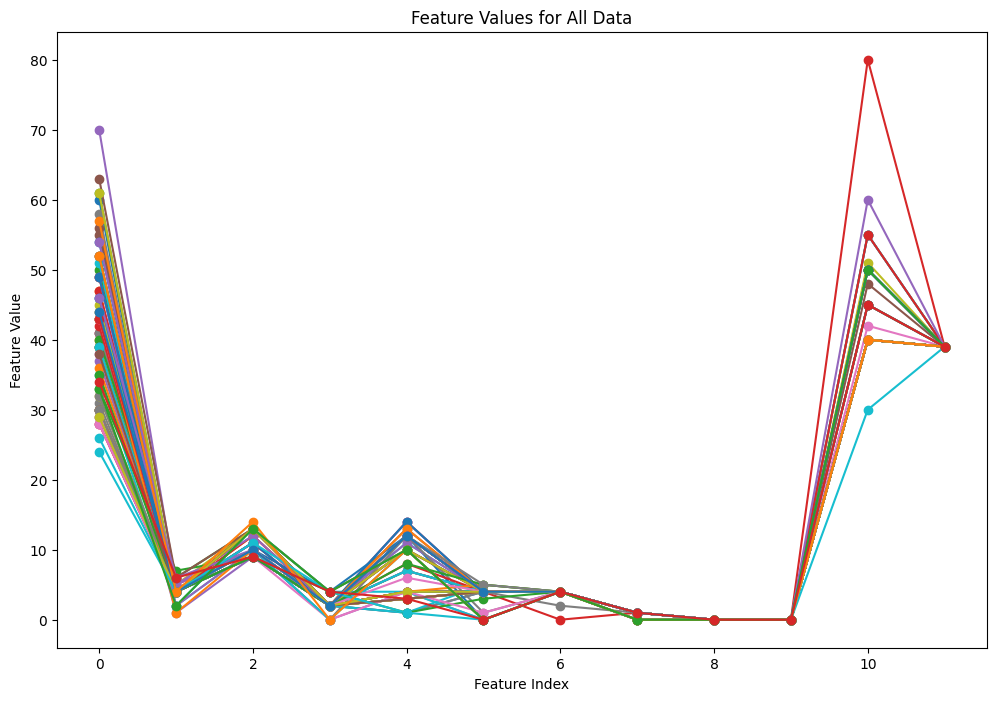

In [21]:
import matplotlib.pyplot as plt

# 获取所有数据
data = shap_values.data[Wrong_pred]
shap_values_all = shap_values.values[Wrong_pred]

print(data.shape)

# 获取数据的特征数量
num_features = data.shape[1]

# 设置图形大小
plt.figure(figsize=(12, 8))

# 遍历每个样本
for idx in range(len(data)):
    # 绘制每个样本的线图，横坐标是特征的索引，纵坐标是样本在该特征上的取值
    plt.plot(range(len(data[idx])), data[idx], '-o')

# 设置图形标题和坐标轴标签
plt.title('Feature Values for All Data')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')

# 显示图形
plt.show()


In [25]:
shap_values[54].data

array([49.,  4., 13.,  2.,  4.,  4.,  4.,  1.,  0.,  0., 40., 39.])

prediction:1,label:False


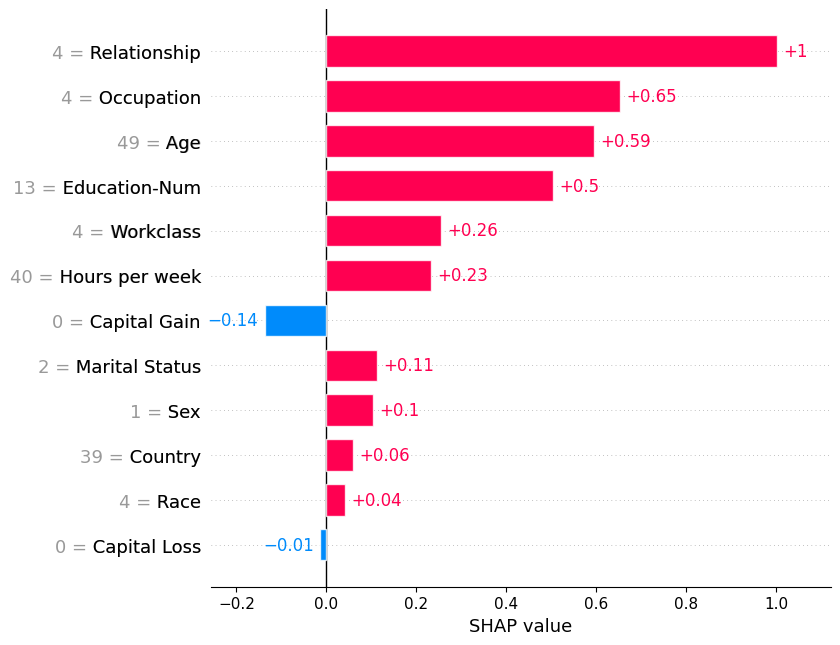

In [23]:
index = 54
print("prediction:{},label:{}".format(predict[index], y[index]))
shap.plots.bar(shap_values[index],max_display=12)

current_shap_values = shap_values[index]


In [44]:
import pandas as pd
counterfactual_instance = [[49.,  4., 13.,  2.,  4.,  3.,  4.,  1.,  0.,  0., 40., 39.]]

counterfactual_instance_df = pd.DataFrame(counterfactual_instance, columns=X.columns)
# Predict the outcome for the counterfactual instance
counterfactual_prediction = model.predict(counterfactual_instance_df)[0]
counterfactual_probability = model.predict_proba(counterfactual_instance_df)[0, 1]
print(f"Counterfactual prediction: {counterfactual_prediction}, Counterfactual probability: {counterfactual_probability}")
initial_prediction = predict[index]
# Ensure the prediction is flipped
if counterfactual_prediction != initial_prediction:
    print("The prediction is successfully flipped.")
else:
    print("The prediction is not flipped. Adjust constraints or bounds and try again.")

# Compute SHAP values for the counterfactual instance
counterfactual_shap_values = explainer(counterfactual_instance_df)
counterfactual_shap_values = counterfactual_shap_values[0]



Counterfactual prediction: 0, Counterfactual probability: 0.20496925711631775
The prediction is successfully flipped.


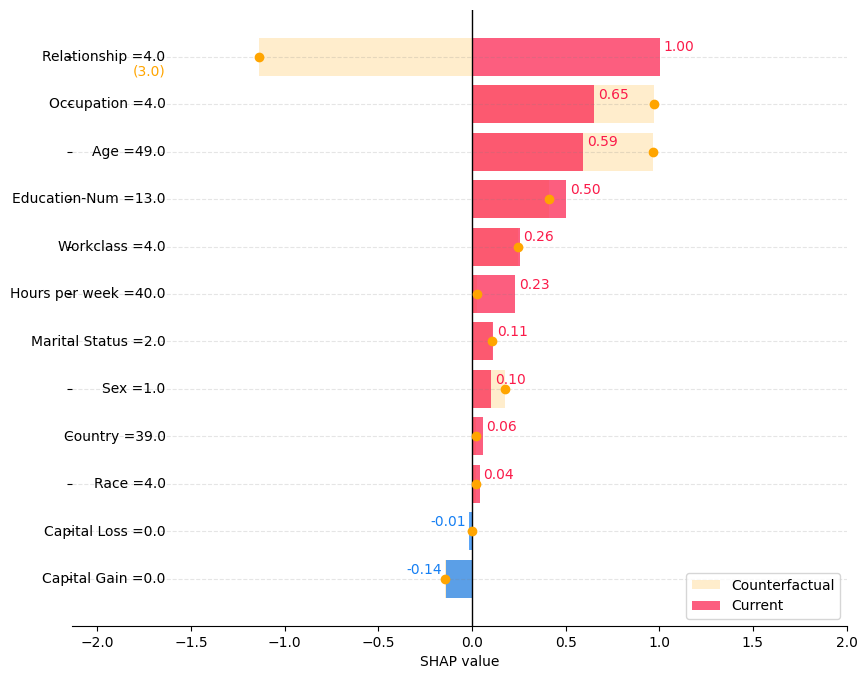

In [45]:
import matplotlib.pyplot as plt
import shap
import pandas as pd
import numpy as np

# Assuming current_shap_values and general_case_shap_values are already defined
# And X is the dataset used for feature columns

# Convert SHAP values to a DataFrame for easier handling
shap_df = pd.DataFrame({
    'feature': X.columns,
    'current_value': current_shap_values.values,
    'current_feature_value': current_shap_values.data,
    'counterfactual_value': counterfactual_shap_values.values,
    'counterfactual_feature_value': counterfactual_shap_values.data,
})

# Sort by current SHAP values
shap_df = shap_df.sort_values(by='current_value', ascending=False).reset_index(drop=True)

# Define colors for positive and negative SHAP values
colors = ['#FB1A49' if val >= 0 else '#157FF3' for val in shap_df['current_value']]

# Plot SHAP values for the current instance
plt.figure(figsize=(10, 8))

# Plot general SHAP values as a background bar with lower opacity
plt.barh(shap_df['feature'], shap_df['counterfactual_value'], color='orange', alpha=0.2, label='Counterfactual')

# Plot current SHAP values
plt.barh(shap_df['feature'], shap_df['current_value'], color=colors, alpha=0.7, label='Current')

# Add a black vertical line at x=0
plt.axvline(x=0, color='black', linewidth=1)

# Add annotations comparing to the general case
for idx, row in shap_df.iterrows():
    plt.scatter([row['counterfactual_value']], [idx], color='orange', edgecolors='orange', zorder=5)
    # plt.text(row['general_value'], idx + 0.4, f"{row['general_value']:.2f}", color='orange')

# Add feature values next to the y-axis and on the bars
for idx, row in shap_df.iterrows():
    if row['current_value'] >= 0:
        plt.text(row['current_value'] + 0.02, idx - 0.2, f"{row['current_value']:.2f}", va='center', color='#FB1A49')
    else:
        plt.text(row['current_value'] - 0.02, idx - 0.2, f"{row['current_value']:.2f}", va='center', ha='right', color='#157FF3')

# plt.title('SHAP Values for Current Instance vs contercounterfactual example')
plt.xlabel('SHAP value')

# Create y-axis labels with feature names and corresponding feature values
ax = plt.gca()

# Set y-tick labels with custom formatting
min_value = min(shap_df['current_value'].min(), shap_df['counterfactual_value'].min())
max_value = max(shap_df['current_value'].max(), shap_df['counterfactual_value'].max())
# Set y-tick labels with custom formatting
for i, row in shap_df.iterrows():
    ax.text(min_value-0.5, i, f"{row['feature']} ={row['current_feature_value']:.1f}", va='center', ha='right', color='black', fontsize=10)
    if row['counterfactual_feature_value'] != row['current_feature_value']:
        ax.text(min_value -0.5, i + 0.3, f"({row['counterfactual_feature_value']:.1f})", va='center', ha='right', color='orange', fontsize=10)

# Remove the top, right, and left borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Invert y-axis to have the highest value on top
plt.gca().invert_yaxis()

# Add horizontal grid lines with dashed style
plt.gca().yaxis.grid(True, linestyle='--', which='both', color='gray', alpha=0.2)

# Hide the default y-tick labels
ax.set_yticklabels([])

# Adjust x-axis limits
plt.gca().set_xlim(left=min_value - 1,right=max_value+1)

# Show the legend
plt.legend()

plt.show()
